Name: Jay Goyal

Roll no.: C017

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 5th February

Date of Submission: 19th February

Experiment Number: 4

Aim:

a. To write a program in PYTHON to perform low pass averaging filtering in spatial domain on an image with Gaussian noise.

b. To write a program in PYTHON to perform median filtering in spatial domain on an image with salt and pepper noise.

c. To write a program in PYTHON to perform high pass filtering in spatial domain on a blur image.

Conclusion: Outcome:

From this experiment we learnt about neighborhood processing in spatial domain: Here, to modify one pixel, we consider values of the immediate neighboring pixels also. For this purpose, 3X3, 5X5, or 7X7 neighborhood mask can be considered.

Low Pass filtering: It is also known as the smoothing filter. It removes the high-frequency content from the image. It is also used to blur an image. A low pass averaging filter mask is as shown in the code.

High Pass Filtering: It eliminates low-frequency regions while retaining or enhancing the high-frequency components. A high pass filtering mask is as shown in the code.

Median Filtering: It is also known as nonlinear filtering. It is used to eliminate salt and pepper noise. Here the pixel value is replaced by the median value of the neighboring pixel.

Collab Link: https://colab.research.google.com/drive/1ZbxLdrMNQ30WGX-BsZpC5gka1TH0Gyv8?usp=sharing



In [ ]:
# Low Pass Spatial Domain Filtering 
# to observe the blurring effect 
  
  
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

   
      
# Read the image 
img = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif', 0) 
  
# Obtain number of rows and columns  
# of the image 
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9

print(mask)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
cv2.imwrite('blurred.tif', img_new)

True

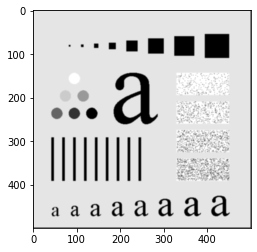

In [ ]:
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)

In [ ]:
#Spatial domain low pass filtering for a variable size image a more generalized approach
img_generalized = np.zeros([m,n], dtype=int)
x= int(input("Enter size of the mask: "))
y=x//2   #as we want both the values plus and minus 2 values
for i in range(1,m-1):
  for j in range(1,n-1):
    temp= img[i+(-x+2):i+(x-1),j+(-x+2):j+(x-1)]    #for the creation of the mask

    constant= np.sum(temp)   #adding the values we calculated
    img_generalized[i,j]= constant//y**2

Enter size of the mask: 15


In [ ]:
#Spatial domain low pass filtering for a variable size image a more generalized approach
img_generalized1 = np.zeros([m,n], dtype=int)
x= int(input("Enter size of the mask: "))
y=x//2   #as we want both the values plus and minus 2 values
for i in range(1,m-1):
  for j in range(1,n-1):
    temp= img[i+(-x+2):i+(x-1),j+(-x+2):j+(x-1)]    #for the creation of the mask

    constant= np.sum(temp)   #adding the values we calculated
    img_generalized1[i,j]= constant//y**2

Enter size of the mask: 35


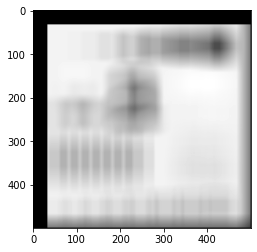

In [ ]:
plt.imshow(img_generalized1, cmap="gray")

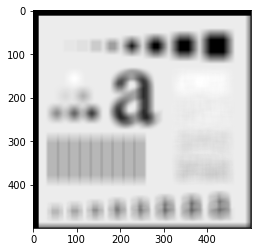

In [ ]:
plt.imshow(img_generalized, cmap="gray")

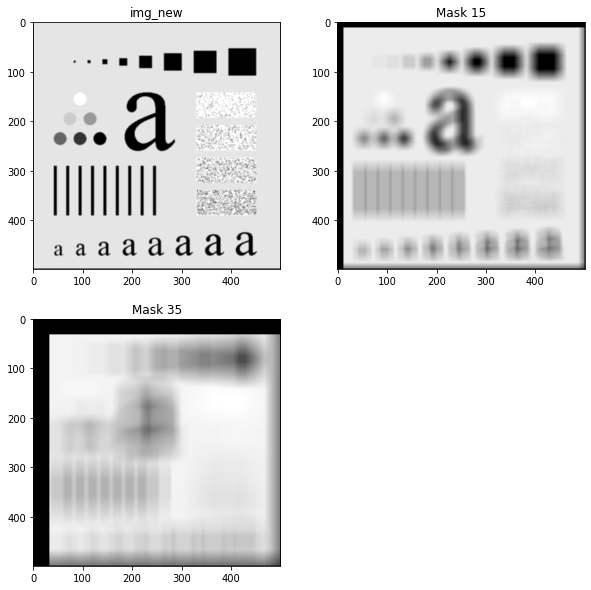

In [ ]:
fig = plt.figure(figsize=(10,10),facecolor='w')
plt.subplot(2,2,1)
plt.title("img_new")
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)
plt.subplot(2,2,2)
plt.title("Mask 15")
plt.imshow(img_generalized, cmap="gray")
plt.subplot(2,2,3)
plt.title("Mask 35")
plt.imshow(img_generalized1, cmap="gray")



In [ ]:
# Read the image method 1
img_salty = cv2.imread('/content/noisysaltpepper.tif', 0)
m1,n1 =img_salty.shape 

Enter the size of mask: 15


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


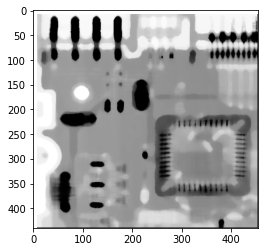

In [ ]:

img_saltless = np.ones([m1, n1]) 
  
b1 = int(input("Enter the size of mask: "))
a1 = b1//2
for i in range(1, m1-1): 
    for j in range(1, n1-1): 
        temp1 = img_salty[i-a1:i+a1 ,j-a1:j+a1]  
        
        constant= np.median(temp1)
        img_saltless[i,j]= constant

plt.imshow(img_saltless, cmap = 'gray')

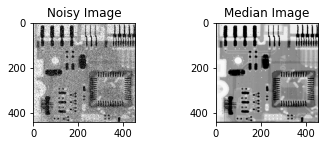

In [ ]:
# Median Spatial Domain Filtering #Method 2(referred the net)
  
  
import cv2 
import numpy as np 
  
  
# Read the image 
img_noisy1 = cv2.imread('/content/noisysaltpepper.tif', 0) 
  
# Obtain the number of rows and columns  
# of the image 
m, n = img_noisy1.shape 
   
# Traverse the image. For every 3X3 area,  
# find the median of the pixels and 
# replace the ceter pixel by the median 
img_new1 = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
cv2.imwrite('new_median_filtered.png', img_new1) 

plt.subplot(2,2,1)
plt.title("Noisy Image")
plt.imshow(img_noisy1, cmap="gray")
plt.subplot(2,2,2)
plt.title("Median Image")
plt.imshow(img_new1, cmap="gray")

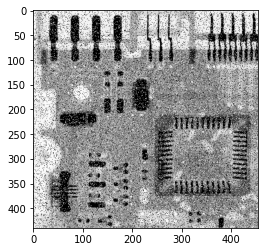

In [ ]:
plt.imshow(img_noisy1, cmap="gray")

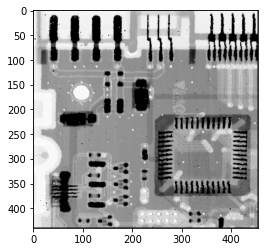

In [ ]:
plt.imshow(img_new1, cmap="gray")

High pass filter

In [ ]:
#import cv2, numpy, matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img= cv2.imread('/content/blurry.tif',0) #Read the image
m,n=img.shape #Obtain number of rows and columns of the image

In [ ]:
#Laplacian mask
mask= np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [ ]:
#Convolve the 3X3 mask over the image 

img_new=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
      
        img_new[i,j]=temp
#img_new=img_new.astype(np.uint8)
cv2.imwrite('laplacian1.png',img_new)

True

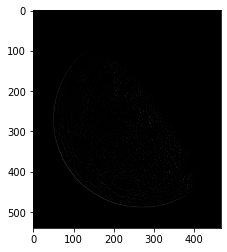

In [ ]:
plt.imshow(img_new,cmap="gray", vmin=0, vmax= 255)

In [ ]:
fmin=np.min(img_new)
print(fmin)
fmax=np.max(img_new)
print(fmax)


-106.0
83.0


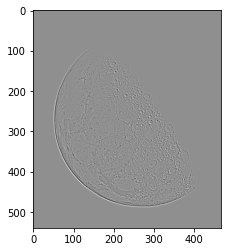

In [ ]:
#scaling
#fm=f−min⁡(f)
#fs=K[fm/max⁡(fm ) , for 8 bit image, K=255 
fm= img_new- fmin
img_sca= 255*fm/np.max(fm)
plt.imshow(img_sca, cmap="gray")

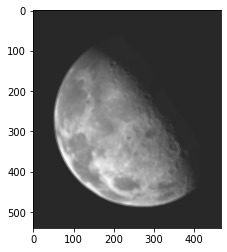

In [ ]:
img_back= img+img_sca
plt.imshow(img_back,cmap="gray")

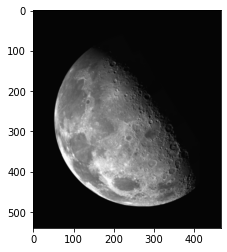

In [ ]:
#g(x,y)= 5f(x,y)− [f(x+1,y)+f(x−1,y)+f(x,y+1)+f(x,y−1)]
g=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        g[i,j]=9*img[i,j]-img[i-1,j]-img[i+1,j]- img[i,j+1]-img[i,j-1]
plt.imshow(g, cmap="gray")

Text(0.5, 1.0, 'Laplacian filtered image with back ground preserved')

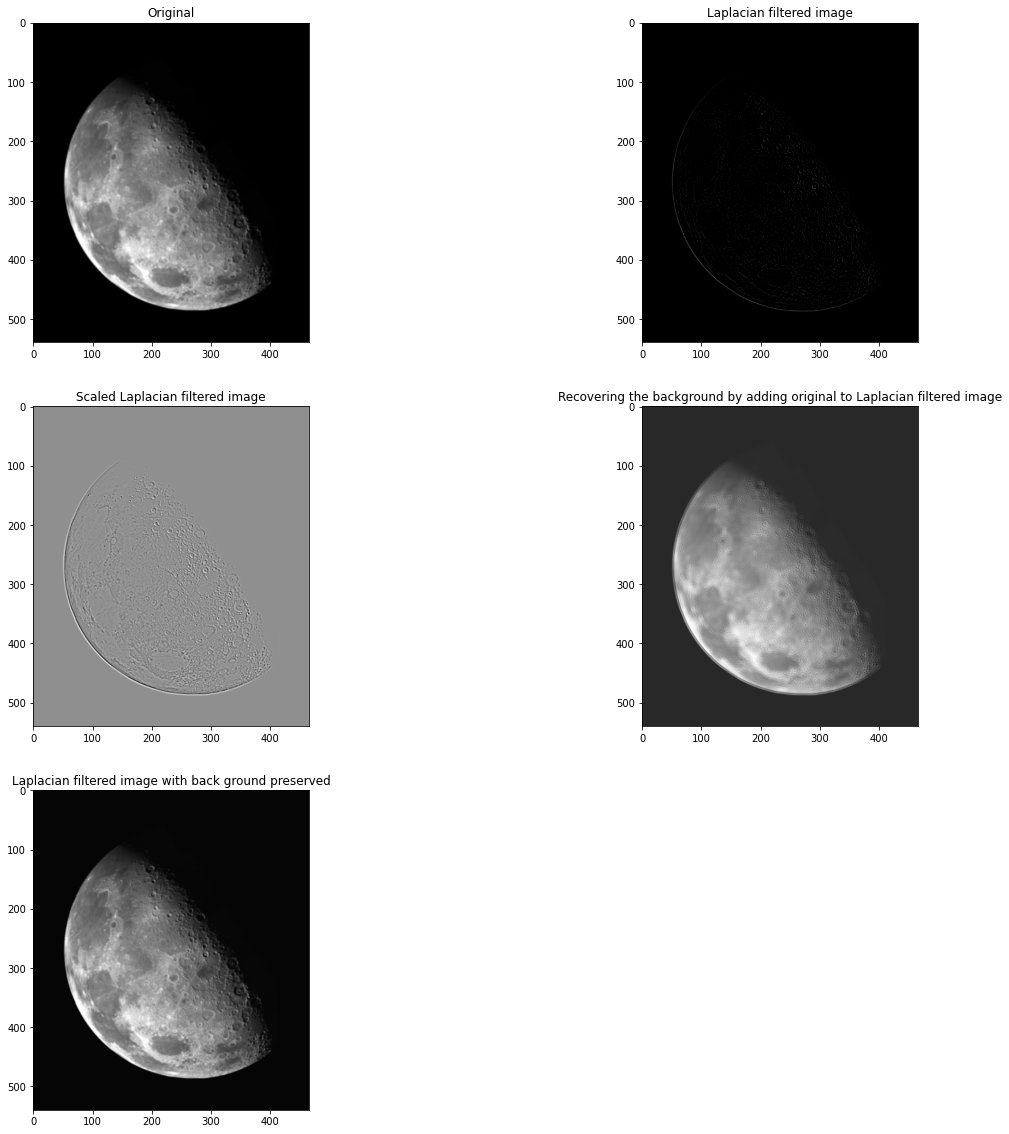

In [ ]:
fig = plt.figure(figsize=(20,20),facecolor='w')
plt.subplot(3,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(3,2,2)
plt.imshow(img_new, cmap="gray", vmax=255,vmin=0)
plt.title("Laplacian filtered image")
plt.subplot(3,2,3)
plt.imshow(img_sca, cmap="gray")
plt.title("Scaled Laplacian filtered image")
plt.subplot(3,2,4)
plt.imshow(img_back, cmap="gray")
plt.title("Recovering the background by adding original to Laplacian filtered image")
plt.subplot(3,2,5)
plt.imshow(g, cmap="gray")
plt.title("Laplacian filtered image with back ground preserved")